In [9]:
import pickle
from matplotlib import pyplot as plt
from jax import numpy as jnp

Text(0.5, 1.0, 'f_rope_norm')

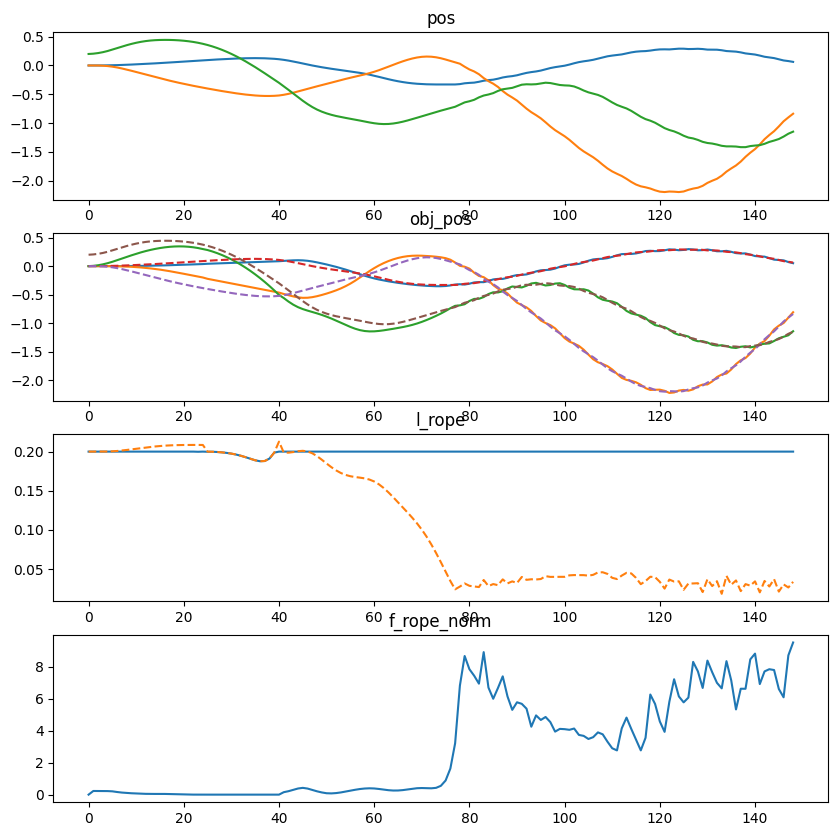

In [12]:
file_path = "../../results/state_seq.pkl"
with open(file_path, "rb") as f:
    state_seq = pickle.load(f)

# plot the state sequence
start = 301
end = 450
pos = jnp.asarray([state_seq[i].pos for i in range(start, end)])
obj_pos = jnp.asarray([state_seq[i].pos_obj for i in range(start, end)])
l_rope = jnp.asarray([state_seq[i].l_rope for i in range(start, end)])
f_rope_norm = jnp.asarray([state_seq[i].f_rope_norm for i in range(start, end)])

plt.figure(figsize=(10, 10))
plt.subplot(411)
plt.plot(pos)
plt.title("pos")
plt.subplot(412)
plt.plot(obj_pos)
plt.plot(pos, '--')
plt.title("obj_pos")
plt.subplot(413)
plt.plot(l_rope)
plt.plot(jnp.linalg.norm(pos - obj_pos, axis=1), '--')
plt.title("l_rope")
plt.subplot(414)
plt.plot(f_rope_norm)
plt.title("f_rope_norm")